In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col='coin_id')

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# we need a scaler due to variability in the max for each range 

In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# are we independent? or suffer from multi-collinearity?
corrs = df_market_data.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

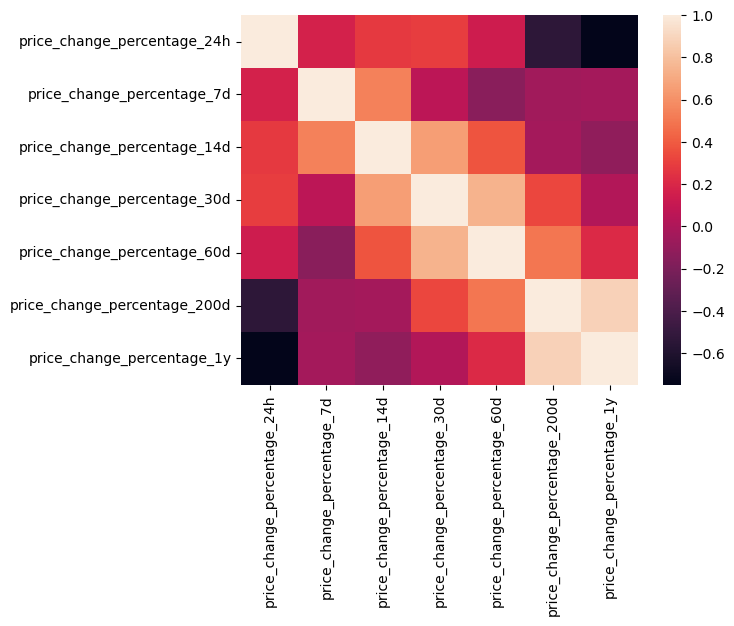

In [8]:
sns.heatmap(corrs)
plt.show

In [9]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
num_features = [ 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

In [11]:
# subset
df_sub = df_market_data.loc[:, num_features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)


df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [12]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Data.

In [13]:
# Create a list with the number of k-values from 1 to 11
X = df_scaled.loc[:, num_features]
X.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [14]:
 # Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [15]:
 # Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(10)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754


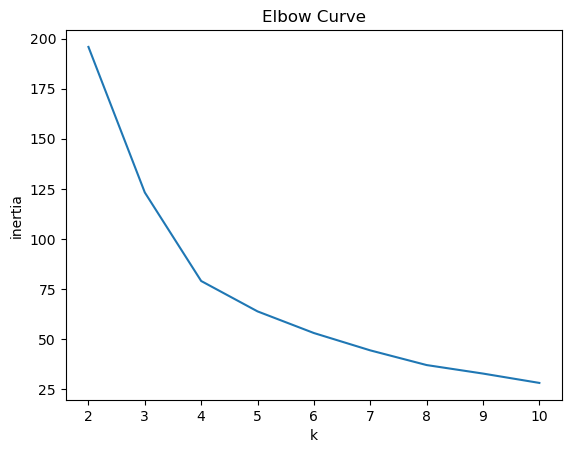

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 or 5

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [17]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [18]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)


In [20]:
# Add a new column to the DataFrame with the predicted clusters
df2 = df_scaled.copy()
df2['clusters'] = preds


# Display sample data
df2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [21]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df2.hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols="coin_id"
)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [22]:
df2.clusters.value_counts()

clusters
0    26
2    13
3     1
1     1
Name: count, dtype: int64

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Instantiate the PCA instance and declare the number of PCA variables
num_pca = len(num_features)
pca = PCA(n_components=num_pca)

# Fit the PCA model on the transformed credit card DataFrame
data_pca = pca.fit_transform(df_scaled.loc[:, num_features])

# Create the PCA DataFrame
df_pca = pd.DataFrame(
    data_pca,
    columns=[f"PCA{x+1}" for x in range(num_pca)]
)

df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


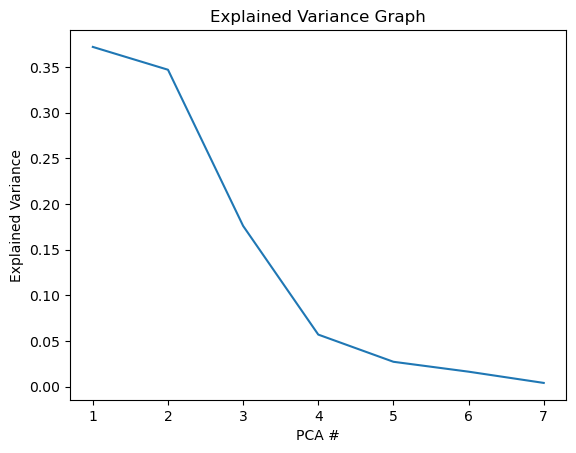

In [24]:
# Can we reduce the dimensions?

# Calculate the PCA explained variance ratio
exp_var = pca.explained_variance_ratio_

plt.plot(range(1, num_pca + 1), exp_var)
plt.title("Explained Variance Graph")
plt.xlabel("PCA #")
plt.ylabel("Explained Variance")
plt.xticks(range(1, num_pca + 1))
plt.show()

In [25]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. (BOOOTH like 4 better)
df3 = df_pca.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4"]]
df3.head()

,PCA1,PCA2,PCA3,PCA4
0,-0.600667,0.842760,0.461595,-0.109151
1,-0.458261,0.458466,0.952877,0.095100
2,-0.433070,-0.168126,-0.641752,-0.470282
3,-0.471835,-0.222660,-0.479053,-0.737473
4,-1.157800,2.041209,1.859715,0.236479


In [26]:
print("Explained Variance")
for i in range(len(exp_var)):
    val = exp_var[i]
    print(f"PCA{i+1}:", round(val, 3))

print()
print("CUMULATIVE Explained Variance")

exp_var_cum = np.cumsum(exp_var)
for i in range(len(exp_var_cum)):
    val = exp_var_cum[i]
    print(f"PCA{i+1}:", round(val, 3))

Explained Variance
PCA1: 0.372
PCA2: 0.347
PCA3: 0.176
PCA4: 0.057
PCA5: 0.027
PCA6: 0.016
PCA7: 0.004

CUMULATIVE Explained Variance
PCA1: 0.372
PCA2: 0.719
PCA3: 0.895
PCA4: 0.952
PCA5: 0.979
PCA6: 0.996
PCA7: 1.0


In [27]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [28]:
pca.explained_variance_ratio_.sum()

1.0

In [29]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895 

In [30]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values from 1 to 11
X = df3.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4"]]
X.head()

,PCA1,PCA2,PCA3,PCA4
0,-0.600667,0.842760,0.461595,-0.109151
1,-0.458261,0.458466,0.952877,0.095100
2,-0.433070,-0.168126,-0.641752,-0.470282
3,-0.471835,-0.222660,-0.479053,-0.737473
4,-1.157800,2.041209,1.859715,0.236479


In [32]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [33]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow2 = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(10)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754


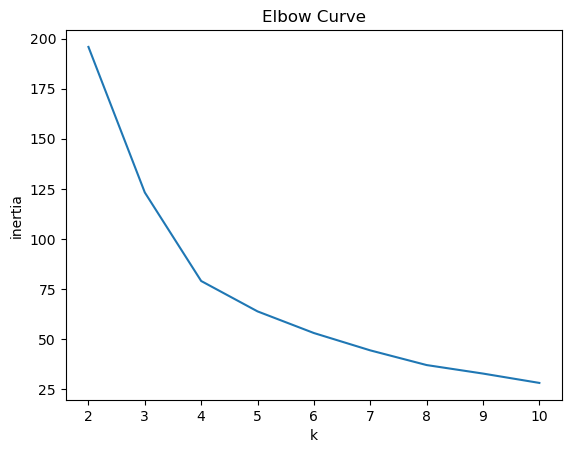

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
plt.plot(df_elbow2["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow2["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No really, Just a bit clearer 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=1)

In [36]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=2, random_state=1)

In [37]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_lower = model.predict(X)
# Print the resulting array of cluster values.


In [38]:
# Create a copy of the DataFrame with the PCA data
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df4 = df3.copy()
df4['clusters'] = preds

df4.head()

# Add a new column to the DataFrame with the predicted clusters


# Display sample data


,PCA1,PCA2,PCA3,PCA4,clusters
0,-0.600667,0.842760,0.461595,-0.109151,2
1,-0.458261,0.458466,0.952877,0.095100,2
2,-0.433070,-0.168126,-0.641752,-0.470282,0
3,-0.471835,-0.222660,-0.479053,-0.737473,0
4,-1.157800,2.041209,1.859715,0.236479,2


In [39]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df4.hvplot.scatter(
    width=800,
    height=400,
    x="PCA1",
    y="PCA2",
    by="clusters",
    hover_cols="coin_id"
)

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [40]:
# Composite plot to contrast the Elbow curves
# Create the Elbow curve plots for the original and second Elbow curves
elbow_plot1 = df_elbow.hvplot.line(x='k', y='inertia', title='Original Data Elbow Curve', xticks=df_elbow['k'])
elbow_plot2 = df_elbow2.hvplot.line(x='k', y='inertia', title='Second Elbow Curve', xticks=df_elbow2['k'])

# Create a composite plot to contrast the Elbow curves
composite_elbow_plot = elbow_plot1 + elbow_plot2

# Display the composite plot
composite_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [43]:
# Composite plot to contrast the clusters
# Create the first scatter plot with original data clusters
plot1 = df2.hvplot.scatter(x='feature1', y='feature2', by='clusters', title='Original Data Clusters')

# Create the second scatter plot with PCA data clusters
plot2 = df4.hvplot.scatter(x='PCA1', y='PCA2', by='clusters', title='PCA Data Clusters')

# Create the composite plot by overlaying the two scatter plots
composite_plot = plot1 + plot2

# Display the composite plot
composite_plot

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['feature1', 'feature2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**DATA IS MORE CONSICE AND LESS DISPERSE
  